In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('./Dataset/Resume.csv' ,encoding='utf-8')
# resumeDataSet['cleaned_resume'] = ''
resumeDataSet

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [26]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [27]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [28]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64


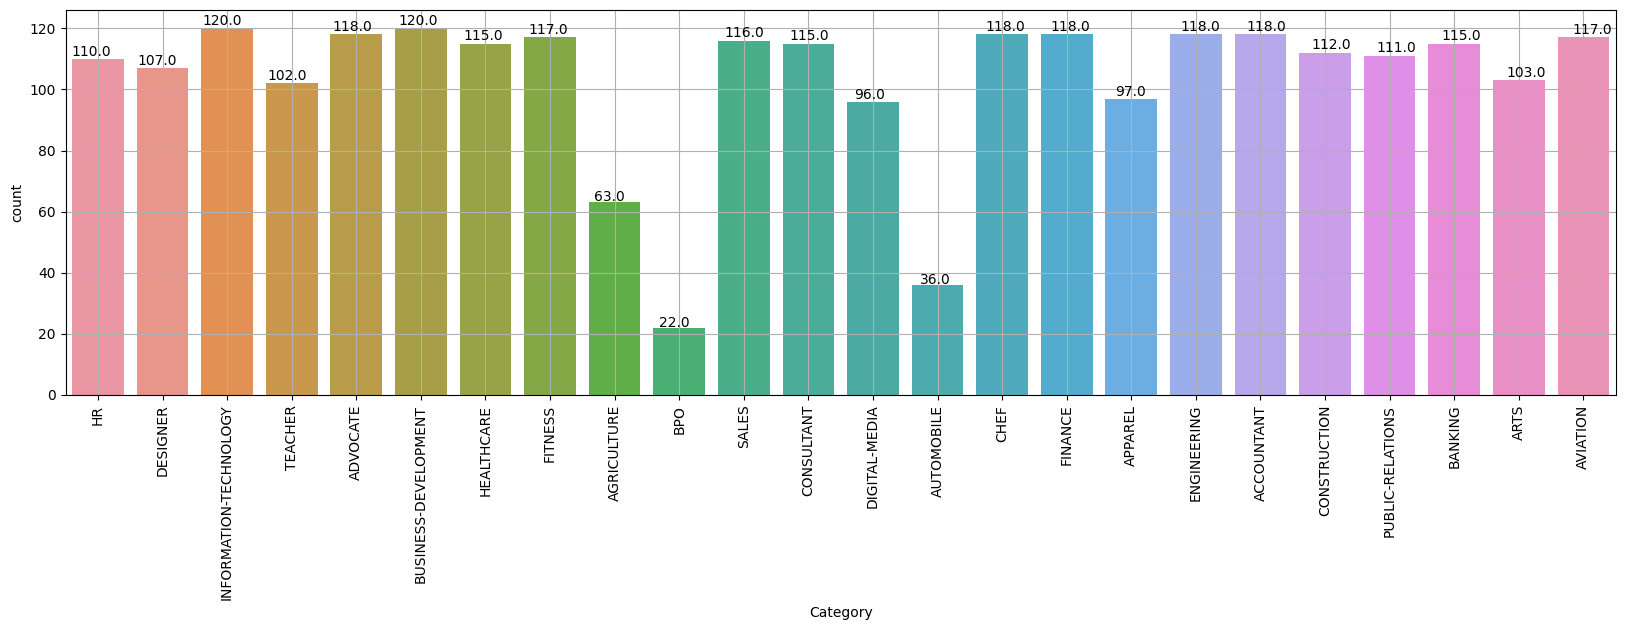

In [29]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

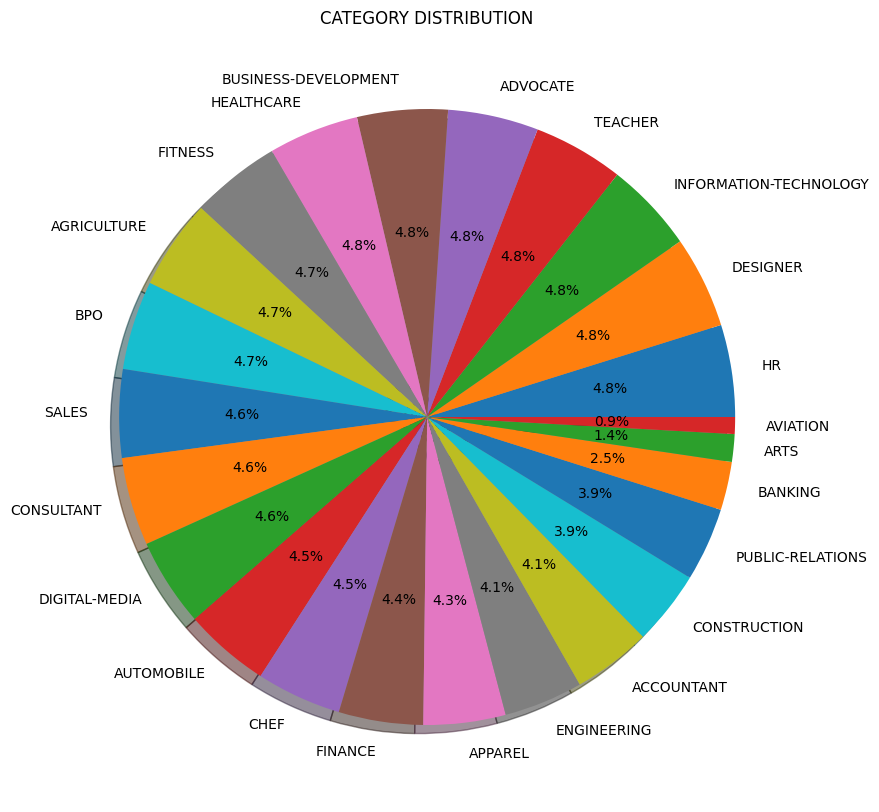

In [30]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [33]:
resumeDataset2 = resumeDataSet
# resumeDataset2 = resumeDataSet.drop(resumeDataSet[(resumeDataSet['Category'] != 'INFORMATION-TECHNOLOGY')].index, inplace=True)
resumeDataset2

,ID,Resume_str,Resume_html,Category
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
...,...,...,...,...
332,27485716,CORPORATE PROJECT MANAGER Caree...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
333,26480367,IT TECHNOLOGY SPECIALIST Profes...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
334,81761658,IT MANAGER Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
335,79541391,SUBJECT MATTER EXPERT (INFORMATION TE...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY


In [36]:
resumeDataset2['cleaned_resume'] = ''
resumeDataset2.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,


In [38]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataset2['cleaned_resume'] = resumeDataset2.Resume_str.apply(lambda x: cleanResume(x))

In [40]:
resumeDataset2.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY Summary Dedicated Info...
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY SPECIALIST GS11 Experi...
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY SUPERVISOR Summary See...
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY INSTRUCTOR Summary Sev...
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY MANAGER ANALYST Profes...


In [43]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataset2['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('State', 621), ('City', 615), ('Information', 551), ('support', 542), ('Name', 515), ('Company', 514), ('IT', 502), ('systems', 475), ('management', 460), ('Management', 432), ('software', 416), ('system', 413), ('data', 412), ('Technology', 405), ('network', 387), ('Microsoft', 372), ('business', 346), ('Windows', 346), ('A', 334), ('new', 313), ('project', 310), ('Network', 280), ('technical', 266), ('Systems', 264), ('team', 258), ('including', 255), ('hardware', 255), ('security', 253), ('development', 248), ('Project', 246), ('I', 244), ('technology', 241), ('customer', 232), ('information', 212), ('using', 209), ('SQL', 209), ('ess', 207), ('Business', 204), ('Server', 200), ('Manager', 191), ('University', 190), ('training', 188), ('application', 186), ('user', 177), ('Security', 175), ('design', 173), ('applications', 172), ('experience', 171), ('database', 171), ('server', 171)]


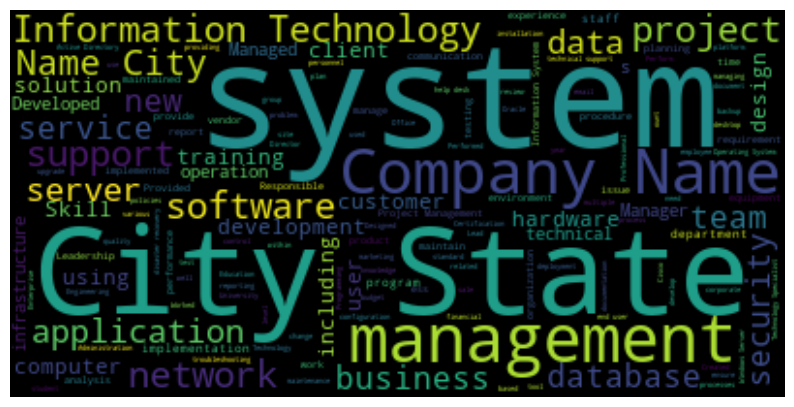

In [44]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataset2[i] = le.fit_transform(resumeDataset2[i])

In [46]:
resumeDataset2.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",0,INFORMATION TECHNOLOGY Summary Dedicated Info...
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",0,INFORMATION TECHNOLOGY SPECIALIST GS11 Experi...
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",0,INFORMATION TECHNOLOGY SUPERVISOR Summary See...
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",0,INFORMATION TECHNOLOGY INSTRUCTOR Summary Sev...
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",0,INFORMATION TECHNOLOGY MANAGER ANALYST Profes...


In [47]:
resumeDataset2.Category.value_counts()

0    120
Name: Category, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataset2['cleaned_resume'].values
requiredTarget = resumeDataset2['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(96, 8369)
(24, 8369)


In [49]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     1.00


In [50]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [58]:
html_view = resumeDataset2['Resume_html'].iat[110]
from IPython.core.display import display, HTML
display(HTML(html_view))

Excellent critical and analytical skills,


In [59]:
Resume_str = resumeDataset2['Resume_str'].iat[110]
Resume_str

"         FREELANCE IT CONSULTANT       Career Overview    Highly skilled, results-driven Information Technology Specialist/Consultant with experience in business operations, infrastructure management, software/hardware support, high/low end PC and Microsoft Server administration, and software development. Core Strengths Excellent critical and analytical skills\t\tBusiness process management Superior organizational, interpersonal, and\t\tAdvanced level hardware and software time management\t\t\ttesting Effective listening and communication\t\t\tContent management systems skills\tMobile application development Troubleshooting and problem solving\t\tAccurate customer needs assessment proficiency\t\tExceptional telephone etiquette Intelligent project management\t\tVast technical knowledge and experience       Qualifications          Excellent critical and analytical skills                  Skills    Active\nDirectory, Active Directory, Application Development, budget, Business Management 

In [63]:
from resume_parser import resumeparse

data = resumeparse.read_file(Resume_str)

OSError: [E053] Could not read config file from c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\resume_parser\degree\model\config.cfg

SyntaxError: invalid syntax (581980377.py, line 1)